# Exploring the spectrum of some TB Models for Si and C

In [1]:
using Plots, JuLIP, JuLIP.ASE, TightBinding, PyPlot
TB = TightBinding
NRLTB = TightBinding.NRLTB

function fermilevel(ϵ)
    e = sort(ϵ)
    @assert iseven(length(e)) 
    Nel = length(e) ÷ 2
    return 0.5 * (e[Nel] + e[Nel+1])
end 

INFO: Recompiling stale cache file /Users/ortner/.julia/lib/v0.5/Optim.ji for module Optim.
INFO: Recompiling stale cache file /Users/ortner/.julia/lib/v0.5/PyPlot.ji for module PyPlot.


fermilevel (generic function with 1 method)

# Carbon

In [2]:
β = 30.0
at = bulk("C", pbc = true, cubic = true)
bzq = TB.MPGrid(at, (16,16,16))
nrltb = TB.NRLTB.NRLTBModel(:C, TB.FermiDiracSmearing(β), bzquad = bzq, cutoff = :original)
ϵ = TB.spectrum(nrltb, at)
sort!(ϵ)
TB.set_δNel!(nrltb, at)
eF = nrltb.potential.eF
eF0 = fermilevel(ϵ)
;

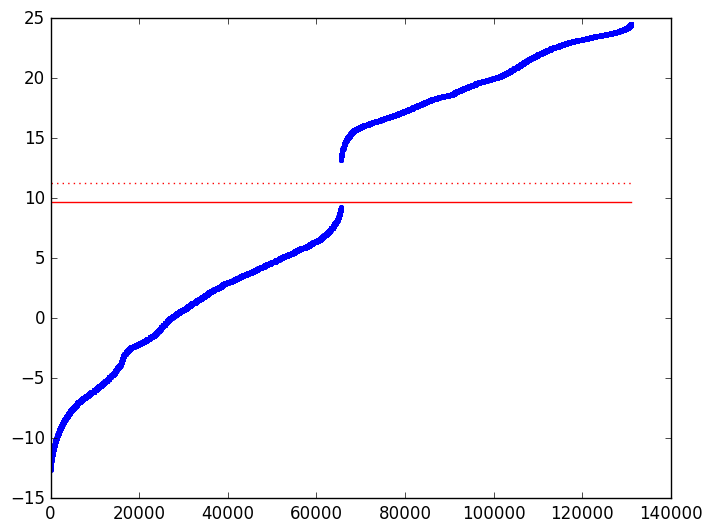

3-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x323717a90>
 PyObject <matplotlib.lines.Line2D object at 0x323717b90>
 PyObject <matplotlib.lines.Line2D object at 0x323728390>

In [3]:
PyPlot.plot(collect(1:length(ϵ)), ϵ,"b.", 
            [1,length(ϵ)], [eF, eF], "r-",
            [1,length(ϵ)], [eF0, eF0], "r:" )

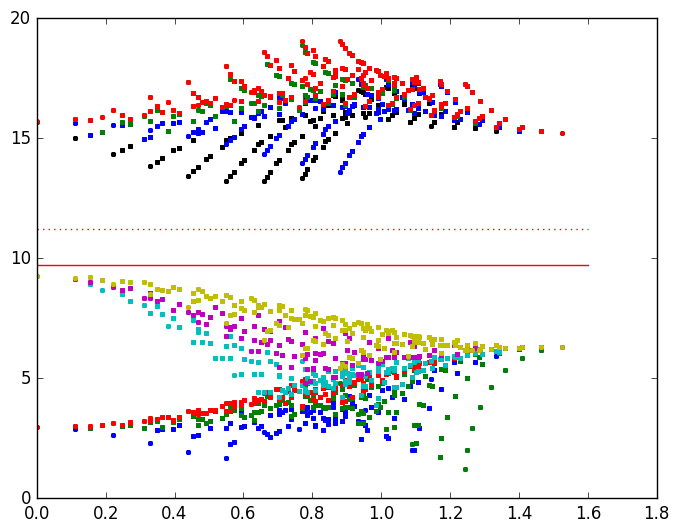

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x323f71ad0>
 PyObject <matplotlib.lines.Line2D object at 0x323f7e190>

In [4]:
k, ϵ = TB.band_structure(nrltb, at)
ϵ = sort(ϵ, 1)
rk = norm.(k)
for n = 11:20
    PyPlot.plot(rk, ϵ[n, :], ".")
end 
PyPlot.plot([0.0, 1.6], [eF, eF], "r-", [0.0, 1.6], [eF0, eF0], "r:")

# Silicon

In [38]:
β = 30.0
at = bulk("Si", pbc = true, cubic = true)
bzq = TB.MPGrid(at, (16,16,16))
nrltb = TB.NRLTB.NRLTBModel(:Si, TB.FermiDiracSmearing(β), bzquad = bzq, cutoff = :original)
ϵ = TB.spectrum(nrltb, at)
sort!(ϵ)
TB.set_δNel!(nrltb, at)
eF = nrltb.potential.eF
eF0 = fermilevel(ϵ)
;


In [39]:
eF, eF0

(5.747760738511848,5.789140666634783)

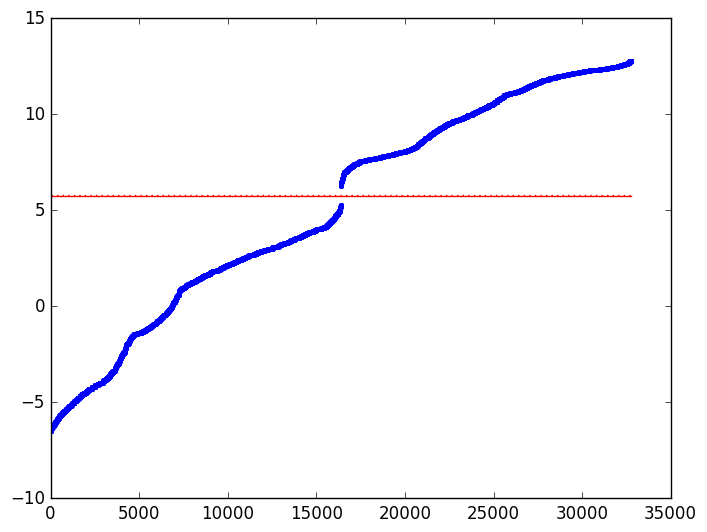

3-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31aa4f450>
 PyObject <matplotlib.lines.Line2D object at 0x31aa4f510>
 PyObject <matplotlib.lines.Line2D object at 0x31aa4f910>

In [36]:
PyPlot.plot(collect(1:length(ϵ)), ϵ,"b.", 
            [1,length(ϵ)], [eF, eF], "r-",
            [1,length(ϵ)], [eF0, eF0], "r:" )

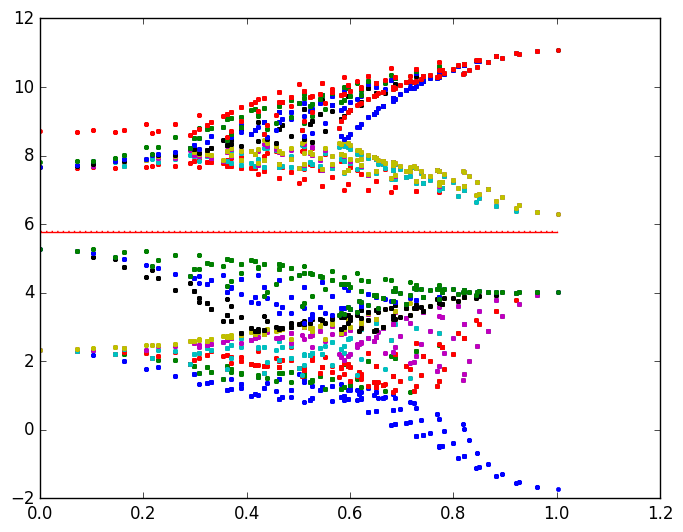

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3206ff990>
 PyObject <matplotlib.lines.Line2D object at 0x3206ffd90>

In [37]:
k, ϵ = TB.band_structure(nrltb, at)
rk = norm.(k)
for n = 8:24
    PyPlot.plot(rk, ϵ[n, :], ".")
end 
PyPlot.plot([0.0, 1.0], [eF, eF], "r-", [0.0, 1.0], [eF0, eF0], "r:")

## Si with Kwon Model

seems in reasonable agreement with NRLTB

In [66]:
β = 30.0
at = bulk("Si", pbc = true, cubic = true)
bzq = TB.MPGrid(at, (16,16,16))
kwon = TB.Kwon.KwonTBModel(potential = TB.FermiDiracSmearing(β), bzquad = bzq)
ϵ_kw = TB.spectrum(kwon, at)
sort!(ϵ_kw)
TB.set_δNel!(kwon, at)
eF_kw = kwon.potential.eF
eF0_kw = fermilevel(ϵ_kw)
;

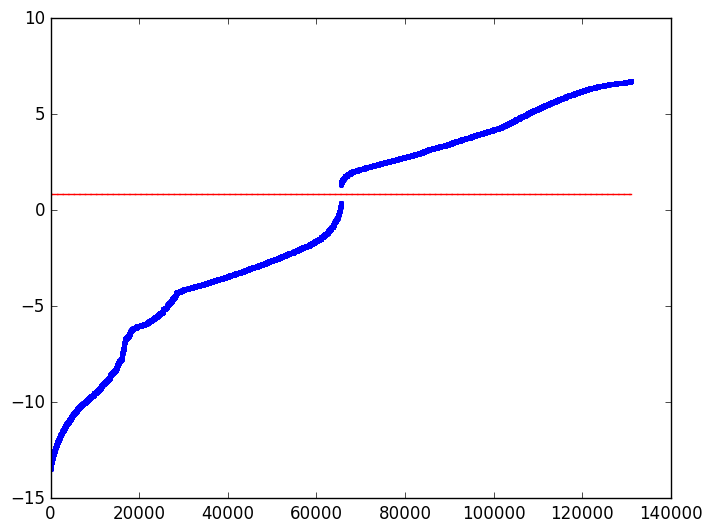

3-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x331163210>
 PyObject <matplotlib.lines.Line2D object at 0x331163310>
 PyObject <matplotlib.lines.Line2D object at 0x331163a90>

In [67]:
PyPlot.plot(collect(1:length(ϵ_kw)), ϵ_kw,"b.", 
            [1,length(ϵ)], [eF_kw, eF_kw], "r-",
            [1,length(ϵ)], [eF0_kw, eF0_kw], "r:" )

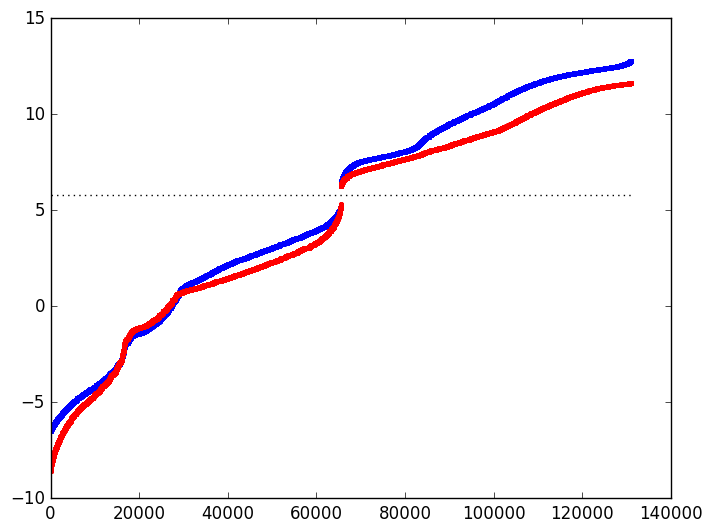

3-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x33c3cdad0>
 PyObject <matplotlib.lines.Line2D object at 0x33c3cdbd0>
 PyObject <matplotlib.lines.Line2D object at 0x33c3db310>

In [69]:
ϵ_kw2 = ϵ_kw - eF0_kw + eF0
PyPlot.plot(collect(1:length(ϵ)), ϵ,"b.", 
            collect(1:length(ϵ_kw2)), ϵ_kw2,"r.", 
            [1,length(ϵ)], [eF0, eF0], "k:" )